<a href="https://colab.research.google.com/github/MidasXIV/Artificial-Intelliegence--Deep-Learning--Tensor-Flow/blob/master/1.%20Linear%20Regression/Regression_AutoMPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression : Miles Per Gallon Dataset


### STEP 1 : Getting the Data

* Make sure you Fix the data, remove "NA" values.
* view the data, shape.

This is a common dataset that contains measurements for cars and their MPG. The following fields are present:

* mpg - The miles per gallon for the car.
* cylinders - The number of cylinders) in the car.
* displacement - The engine displacement.
* horsepower - The horsepower produced by the car/engine.
* weight - The weight of the car.
* acceleration - The acceleration of the car.
* year - The year the car was produced.
* origin - Where the car was produced, 1=USA, 2=Europe, 3=Asia.
* name - The name of the car.





#### STEP 1.1 Identify Missing Values

In [0]:
import pandas as pd
import numpy  as np

df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/auto-mpg.csv",na_values=['NA', '?'])

print("SHAPE :: "+ str(df.shape))                            # To find the number of features and observations
print("Any NA values ? : " + str(df.isnull().values.any()))  # To find if any values are NA
print(df.isnull().any())                                     # Find which columns have NA values
print(df.isnull().sum().sum())                               # This returns an integer of the total number of NaN values
nan_rows = df[df['horsepower'].isnull()]                     # To find out which rows have NaNs in a specific column
nan_rows

#### STEP 1.2 Fixing Missing Values

In [43]:
# Handle missing value, by placing the median in empty places
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

print("Any NA values ? : " + str(df.isnull().values.any()))

df.index

Any NA values ? : False


RangeIndex(start=0, stop=398, step=1)

In [36]:
# Shuffle
np.random.seed(42)                                  # makes the random numbers predictable
df = df.reindex(np.random.permutation(df.index))    # changes the row labels and column labels of a DataFrame
df.reset_index(inplace=True, drop=True)             # generate a new DataFrame or Series with the index reset.
df[0:10]                                            # View random 10 entries

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,33.0,4,91.0,53.0,1795,17.4,76,3,honda civic
1,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
2,19.0,6,232.0,100.0,2634,13.0,71,1,amc gremlin
3,13.0,8,318.0,150.0,3940,13.2,76,1,plymouth volare premier v8
4,14.0,8,318.0,150.0,4237,14.5,73,1,plymouth fury gran sedan
5,27.0,4,97.0,88.0,2100,16.5,72,3,toyota corolla 1600 (sw)
6,24.0,4,140.0,92.0,2865,16.4,82,1,ford fairmont futura
7,13.0,8,440.0,215.0,4735,11.0,73,1,chrysler new yorker brougham
8,17.0,8,260.0,110.0,4060,19.0,77,1,oldsmobile cutlass supreme
9,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick


In [0]:
# Pandas to Numpy
names = ['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'year', 'origin']
x = df[names].values
y = df['mpg'].values # regression

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45)

In [0]:
# Simple function to evaluate the coefficients of a regression
%matplotlib inline    
from IPython.display import display, HTML    

def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print(f"Intercept: {intercept}")
    r['coef'].plot(kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))

### STEP 2 : Making the Model

#### Step : 2.1 Importing Dependencies

In [0]:
import tensorflow as tf
# from tensorflow.keras.models    import Sequential
# from tensorflow.keras.layers    import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

#### Step 2.2 : Creating LAyers and Models

In [68]:
I0 = tf.keras.layers.Dense(units=20,input_dim=x_train.shape[1],activation='relu')
I1 = tf.keras.layers.Dense(units=5,activation='relu')
I2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([I0,I1,I2])

model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto', restore_best_weights=True)
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=200)

# history = model.fit(x_train,y_train,verbose=True,epochs=100)

# Predict
pred = model.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")



Epoch 1/100
298/298 [==============================] - 1s 2ms/sample - loss: 125903.4286
Epoch 2/100
298/298 [==============================] - 0s 62us/sample - loss: 626.6716
Epoch 3/100
298/298 [==============================] - 0s 59us/sample - loss: 625.5470
Epoch 4/100
298/298 [==============================] - 0s 66us/sample - loss: 621.0183
Epoch 5/100
298/298 [==============================] - 0s 59us/sample - loss: 614.6673
Epoch 6/100
298/298 [==============================] - 0s 63us/sample - loss: 607.3007
Epoch 7/100
298/298 [==============================] - 0s 56us/sample - loss: 599.1075
Epoch 8/100
298/298 [==============================] - 0s 62us/sample - loss: 590.3425
Epoch 9/100
298/298 [==============================] - 0s 65us/sample - loss: 581.0693
Epoch 10/100
298/298 [==============================] - 0s 60us/sample - loss: 571.4506
Epoch 11/100
298/298 [==============================] - 0s 72us/sample - loss: 561.4932
Epoch 12/100
298/298 [=================

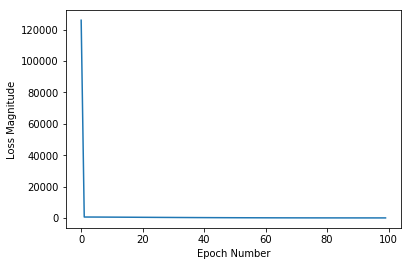

In [69]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

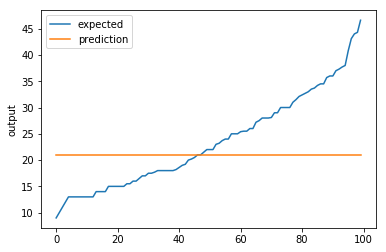

In [71]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
chart_regression(pred.flatten(),y_test)